In [1]:
import warnings
warnings.filterwarnings("ignore")

# Basics - Data Handling
import numpy as np
import pandas as pd

# sklearn Classification and Model Building
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Cross Validation
from sklearn.model_selection import GridSearchCV

# Scoring functions
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Plotting
import matplotlib.pyplot as plt

## Read Data

In [2]:
X_train = pd.read_csv("datasets/train_smote.csv", index_col=0)
y_train = X_train["y"]
X_train.drop(["y"], axis=1, inplace=True)
X_train.head(2)

,Income,Age,Score1,Score3,Score4,Score5,Loan type_1.0,Occupation type_1.0,Occupation type_2.0
0,16167.84409,1.0,0.272247,7.793966,602.632122,3396.474235,0,1,0
1,15772.85155,0.0,0.203328,12.165225,600.397183,3476.857709,0,1,0


## Grid Search with 5-fold CV

## [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [3]:
# GridSearch for MLP
parameters = {'hidden_layer_sizes':[(50,),(100,),(200,)], 'learning_rate':['constant', 'adaptive'], 'early_stopping':[True, False]}
model = MLPClassifier(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/mlp_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.093337,5.735616,0.049536,0.004857,True,"(50,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.832552,0.789568,0.851907,0.825591,0.857009,0.831325,0.023922,3
1,22.920570,8.781274,0.051829,0.005084,True,"(50,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.832552,0.789568,0.851907,0.825591,0.857009,0.831325,0.023922,3
2,43.653032,16.353532,0.069954,0.009473,True,"(100,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.820088,0.856799,0.858260,0.873014,0.850077,0.851648,0.017466,1
3,37.945214,14.203473,0.063179,0.010767,True,"(100,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.820088,0.856799,0.858260,0.873014,0.850077,0.851648,0.017466,1
4,30.005682,9.492491,0.107681,0.002959,True,"(200,)",constant,"{'early_stopping': True, 'hidden_layer_sizes':...",0.831477,0.636774,0.841750,0.859928,0.824734,0.798933,0.081944,5
5,29.607980,9.527550,0.111407,0.006404,True,"(200,)",adaptive,"{'early_stopping': True, 'hidden_layer_sizes':...",0.831477,0.636774,0.841750,0.859928,0.824734,0.798933,0.081944,5
6,13.228956,1.824432,0.042398,0.006118,False,"(50,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.713055,0.766980,0.625554,0.741955,0.733870,0.716283,0.048540,7
7,13.222710,1.778445,0.037929,0.000504,False,"(50,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.713055,0.766980,0.625554,0.741955,0.733870,0.716283,0.048540,7
8,36.357850,15.153926,0.076251,0.006788,False,"(100,)",constant,"{'early_stopping': False, 'hidden_layer_sizes'...",0.405939,0.805941,0.852789,0.726747,0.203716,0.599026,0.251823,11
9,36.795651,15.463835,0.079245,0.009053,False,"(100,)",adaptive,"{'early_stopping': False, 'hidden_layer_sizes'...",0.405939,0.805941,0.852789,0.726747,0.203716,0.599026,0.251823,11


## MLP with Pipeline

In [4]:
# GridSearch for MLP, Standard Scaling
parameters = {'mlp__hidden_layer_sizes':[(50,),(100,),(200,)], 'mlp__learning_rate':['constant', 'adaptive'], 'mlp__early_stopping':[True, False]}
model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=1000, random_state=42))])

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/mlp_stdscaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__early_stopping,param_mlp__hidden_layer_sizes,param_mlp__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,52.369903,6.624602,0.054490,0.009572,True,"(50,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.972710,0.983026,0.985501,0.985061,0.980489,0.981358,0.004673,11
1,57.753451,12.624178,0.047605,0.002271,True,"(50,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.972710,0.983026,0.985501,0.985061,0.980489,0.981358,0.004673,11
2,60.988719,5.417109,0.078875,0.011582,True,"(100,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.975775,0.985116,0.986898,0.986977,0.985396,0.984032,0.004197,9
3,63.919460,6.478846,0.073860,0.003954,True,"(100,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.975775,0.985116,0.986898,0.986977,0.985396,0.984032,0.004197,9
4,86.725071,25.329384,0.145424,0.011471,True,"(200,)",constant,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.974061,0.987893,0.987389,0.986763,0.987176,0.984656,0.005310,7
5,79.215362,20.555107,0.140862,0.003584,True,"(200,)",adaptive,"{'mlp__early_stopping': True, 'mlp__hidden_lay...",0.974061,0.987893,0.987389,0.986763,0.987176,0.984656,0.005310,7
6,137.501623,28.858772,0.048050,0.002899,False,"(50,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.975899,0.988058,0.986808,0.988863,0.987790,0.985484,0.004837,5
7,169.347074,53.762756,0.049369,0.002669,False,"(50,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.975899,0.988058,0.986808,0.988863,0.987790,0.985484,0.004837,5
8,266.072091,9.710005,0.108721,0.027207,False,"(100,)",constant,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.979153,0.987858,0.990039,0.990924,0.988958,0.987386,0.004244,1
9,175.656541,25.235027,0.085910,0.001518,False,"(100,)",adaptive,"{'mlp__early_stopping': False, 'mlp__hidden_la...",0.979153,0.987858,0.990039,0.990924,0.988958,0.987386,0.004244,1


## [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [5]:
# GridSearch for Random Forest
parameters = {'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = RandomForestClassifier(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/rf_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.770911,0.357813,0.311308,0.003226,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.975983,0.988676,0.988892,0.989162,0.988609,0.986264,0.005145,1
1,15.852494,0.261460,0.308165,0.003242,None,3,"{'max_depth': None, 'min_samples_split': 3}",0.975347,0.988809,0.988802,0.988760,0.988251,0.985994,0.005327,3
2,20.493523,2.277524,0.409775,0.034156,None,4,"{'max_depth': None, 'min_samples_split': 4}",0.976111,0.988894,0.988667,0.988625,0.987850,0.986029,0.004972,2
3,12.987833,2.349542,0.229841,0.039098,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.959295,0.974543,0.975272,0.974315,0.973908,0.971467,0.006102,6
4,11.517749,0.077742,0.210858,0.003359,10,3,"{'max_depth': 10, 'min_samples_split': 3}",0.959496,0.974679,0.975415,0.974550,0.974643,0.971757,0.006138,5
5,12.141402,0.891349,0.216969,0.011283,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.959832,0.974861,0.975094,0.974763,0.975098,0.971930,0.006050,4
6,9.274458,0.365551,0.163696,0.002048,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.940035,0.955387,0.956463,0.954504,0.954238,0.952125,0.006095,9
7,9.782028,0.427322,0.167660,0.005288,7,3,"{'max_depth': 7, 'min_samples_split': 3}",0.940701,0.955787,0.956486,0.954350,0.954385,0.952342,0.005878,8
8,9.192439,0.106303,0.189130,0.051371,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.941020,0.956231,0.956020,0.954360,0.954372,0.952401,0.005745,7
9,9.133165,1.776960,0.182980,0.053684,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.912865,0.934616,0.939679,0.933382,0.935230,0.931154,0.009389,10


## [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [6]:
# GridSearch for AdaBoost
parameters = {'algorithm':['SAMME', 'SAMME.R']}
model = AdaBoostClassifier(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/adaboost_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.827998,0.704317,0.052048,0.010975,SAMME,{'algorithm': 'SAMME'},0.882570,0.913960,0.918008,0.917557,0.922554,0.910930,0.01444,2
1,4.123478,0.016647,0.088691,0.000982,SAMME.R,{'algorithm': 'SAMME.R'},0.905616,0.931657,0.932688,0.931048,0.932133,0.926629,0.01052,1


## [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [7]:
# GridSearch for KNN
parameters = {'n_neighbors':[3, 5, 10, 15]}
model = KNeighborsClassifier()

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/knn_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175926,0.022018,0.637395,0.046223,3,{'n_neighbors': 3},0.947545,0.945629,0.945792,0.943784,0.946859,0.945922,0.001280,1
1,0.171477,0.013540,0.667038,0.051468,5,{'n_neighbors': 5},0.939427,0.936598,0.938453,0.936732,0.938970,0.938036,0.001162,2
2,0.172241,0.008957,0.717805,0.016657,10,{'n_neighbors': 10},0.927730,0.926166,0.927975,0.925185,0.927740,0.926959,0.001096,3
3,0.178850,0.009006,0.786475,0.043938,15,{'n_neighbors': 15},0.912225,0.910997,0.913341,0.910596,0.912829,0.911998,0.001050,4


## [KNN with Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [8]:
# GridSearch for KNN with StandardScaler
parameters = {'knn__n_neighbors':[3, 5, 10, 15]}
model = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/knn_stdscaler_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.171467,0.016049,1.257305,0.077728,3,{'knn__n_neighbors': 3},0.977014,0.983173,0.985323,0.985242,0.985117,0.983174,0.003182,1
1,0.154278,0.003218,1.319354,0.035646,5,{'knn__n_neighbors': 5},0.974768,0.982987,0.983191,0.983519,0.982980,0.981489,0.003366,2
2,0.151419,0.000930,1.594745,0.008517,10,{'knn__n_neighbors': 10},0.967971,0.980022,0.979872,0.980198,0.976977,0.977008,0.004672,3
3,0.151147,0.001258,1.808690,0.027968,15,{'knn__n_neighbors': 15},0.966383,0.978157,0.977808,0.979008,0.975581,0.975387,0.004642,4


## [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [9]:
# GridSearch for DecisionTreeClassifier
parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 10, 7, 5], 'min_samples_split':[2, 3, 4]}
model = DecisionTreeClassifier(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/decisiontree_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.674387,0.017642,0.012455,0.000733,gini,None,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.965157,0.975895,0.979059,0.978786,0.976370,0.975053,0.005106,4
1,0.069653,0.001871,0.012714,0.000269,gini,None,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.963093,0.976477,0.977161,0.978156,0.975789,0.974135,0.005576,9
2,0.659199,0.028124,0.012090,0.000257,gini,None,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.963649,0.975707,0.979181,0.979228,0.977090,0.974971,0.005815,6
3,0.067967,0.002614,0.012613,0.000235,gini,None,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.960673,0.976117,0.975082,0.976862,0.976452,0.973037,0.006210,12
4,0.660544,0.026469,0.012071,0.000217,gini,None,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.963686,0.975484,0.979182,0.978387,0.976920,0.974732,0.005666,7
5,0.067559,0.000988,0.012529,0.000268,gini,None,4,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.960471,0.977602,0.977560,0.977194,0.975894,0.973744,0.006665,10
6,0.531295,0.010049,0.011379,0.000266,gini,10,2,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.950992,0.967870,0.969446,0.967008,0.968340,0.964731,0.006914,15
7,0.048389,0.000655,0.011712,0.000267,gini,10,2,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.908957,0.924562,0.913287,0.932733,0.939999,0.923908,0.011607,28
8,0.533087,0.010285,0.011381,0.000267,gini,10,3,best,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.951184,0.967951,0.969443,0.966956,0.968645,0.964836,0.006875,14
9,0.049336,0.001273,0.011708,0.000237,gini,10,3,random,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.904183,0.905610,0.934201,0.926759,0.933489,0.920848,0.013289,30


## [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [10]:
# GridSearch for SGDClassifier
parameters = {'penalty':['l2','l1','elasticnet'], 'learning_rate':['constant','optimal','invscaling','adaptive'], 'eta0':[0.001, 0.05, 0.01, 0.1, 0.5, 1]}
model = SGDClassifier(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/sgd_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.774193,0.158204,0.027890,0.011560,0.001,constant,l2,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.330607,0.666885,0.774907,0.594648,0.000535,0.473516,0.278221,65
1,1.104324,0.181571,0.022587,0.002260,0.001,constant,l1,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.765391,0.782056,0.674010,0.526796,0.734298,0.696510,0.092520,56
2,1.528636,0.345031,0.025352,0.002660,0.001,constant,elasticnet,"{'eta0': 0.001, 'learning_rate': 'constant', '...",0.731000,0.667005,0.671432,0.591399,0.670910,0.666349,0.044372,61
3,6.948836,0.466000,0.023896,0.001042,0.001,optimal,l2,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.800019,0.789422,0.771414,0.651949,0.801834,0.762928,0.056533,35
4,3.350017,0.810974,0.021732,0.000322,0.001,optimal,l1,"{'eta0': 0.001, 'learning_rate': 'optimal', 'p...",0.786147,0.786332,0.796811,0.795890,0.796502,0.792336,0.004987,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4.560351,0.468787,0.022504,0.000703,1,invscaling,l1,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.705641,0.797634,0.694284,0.793780,0.803204,0.758909,0.048356,41
68,4.757399,0.633029,0.021300,0.000320,1,invscaling,elasticnet,"{'eta0': 1, 'learning_rate': 'invscaling', 'pe...",0.364642,0.780651,0.789544,0.791894,0.694294,0.684205,0.163840,57
69,6.568300,1.795441,0.026794,0.003350,1,adaptive,l2,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.801586,0.798152,0.803637,0.803441,0.800469,0.801457,0.002030,4
70,4.036290,0.611888,0.023282,0.001333,1,adaptive,l1,"{'eta0': 1, 'learning_rate': 'adaptive', 'pena...",0.795746,0.790026,0.798205,0.794181,0.796586,0.794949,0.002784,18


## [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [11]:
# GridSearch for LogisticRegression
parameters = {'penalty':['l2','l1','elasticnet'], 'C':[1, 10, 50, 100, 200, 500], 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
model = LogisticRegression(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/logistic_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.446116,1.209277,0.023749,0.001698,1,l2,newton-cg,"{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}",0.853860,0.874910,0.879334,0.881033,0.877467,0.873321,0.009940,6
1,1.126089,0.207282,0.031998,0.007924,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.804313,0.811869,0.816862,0.804215,0.815059,0.810464,0.005309,23
2,0.740407,0.096197,0.018749,0.000669,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.854161,0.873074,0.876303,0.878244,0.874728,0.871302,0.008740,7
3,3.314447,0.596087,0.027944,0.003736,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.788725,0.786526,0.790583,0.789262,0.789121,0.788843,0.001316,25
4,2.969568,0.065124,0.025471,0.001108,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.769933,0.767759,0.769408,0.770983,0.771630,0.769943,0.001340,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.006118,0.000529,0.000000,0.000000,500,elasticnet,newton-cg,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,54
86,0.005479,0.000139,0.000000,0.000000,500,elasticnet,lbfgs,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
87,0.005480,0.000141,0.000000,0.000000,500,elasticnet,liblinear,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
88,0.005153,0.000718,0.000000,0.000000,500,elasticnet,sag,"{'C': 500, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,84


## [SVM with Pipeline](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)

In [4]:
# GridSearch for SVM, StandardScaler - Run on Google Colab
parameters = {'svc__C':[1, 10, 50, 100, 200, 500], 'svc__gamma':['scale', 'auto']}
model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=42))])

clf = GridSearchCV(model, parameters, scoring="f1", verbose=4, n_jobs=-1)
clf.fit(X_train, y_train)
df = pd.DataFrame(clf.cv_results_)
df.to_csv("/content/drive/MyDrive/ms4610_project/parameter_search/svm_stdscaler_param_tuning.csv")
df

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 62.2min finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,69.166824,2.860669,10.908463,0.363894,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.959391,0.974181,0.974588,0.972775,0.973455,0.970878,0.005777,11
1,68.927757,3.204570,10.865314,0.383837,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.959391,0.974181,0.974588,0.972775,0.973455,0.970878,0.005777,11
2,61.723366,3.873058,8.103805,0.334313,10,scale,"{'svc__C': 10, 'svc__gamma': 'scale'}",0.964014,0.978964,0.979421,0.978614,0.979577,0.976118,0.006061,9
3,62.992307,3.969130,8.053909,0.333345,10,auto,"{'svc__C': 10, 'svc__gamma': 'auto'}",0.964014,0.978964,0.979421,0.978614,0.979577,0.976118,0.006061,9
4,80.517618,6.961829,6.867064,0.355988,50,scale,"{'svc__C': 50, 'svc__gamma': 'scale'}",0.966642,0.981913,0.982194,0.982295,0.981861,0.978981,0.006172,7
5,80.666216,6.326312,6.861264,0.347786,50,auto,"{'svc__C': 50, 'svc__gamma': 'auto'}",0.966642,0.981913,0.982194,0.982295,0.981861,0.978981,0.006172,7
6,101.489403,8.386863,6.501961,0.339588,100,scale,"{'svc__C': 100, 'svc__gamma': 'scale'}",0.966890,0.982412,0.982827,0.983156,0.982409,0.979539,0.006330,5
7,102.894329,8.646539,6.448124,0.360220,100,auto,"{'svc__C': 100, 'svc__gamma': 'auto'}",0.966890,0.982412,0.982827,0.983156,0.982409,0.979539,0.006330,5
8,141.993136,15.025401,6.153601,0.339881,200,scale,"{'svc__C': 200, 'svc__gamma': 'scale'}",0.967983,0.982911,0.983680,0.983387,0.982955,0.980183,0.006107,3
9,142.180076,13.463157,6.129394,0.324919,200,auto,"{'svc__C': 200, 'svc__gamma': 'auto'}",0.967983,0.982911,0.983680,0.983387,0.982955,0.980183,0.006107,3


## [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [5]:
# GridSearch for SVM
parameters = {'C':[1, 10, 50, 100, 200, 500], 'gamma':['scale', 'auto']}
model = SVC(random_state=42)

clf = GridSearchCV(model, parameters, scoring="f1")
df = pd.DataFrame(clf.cv_results_)
df.to_csv("parameter_search/svm_param_tuning.csv")
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,463.783861,81.205084,42.242590,0.849936,1,scale,"{'C': 1, 'gamma': 'scale'}",0.709638,0.702923,0.707484,0.709113,0.708854,0.707602,0.002445,12
1,1377.503292,16.153404,58.870070,0.351073,1,auto,"{'C': 1, 'gamma': 'auto'}",0.941614,0.922296,0.924946,0.919779,0.923339,0.926395,0.007793,6
2,401.752753,62.291967,37.603628,0.663652,10,scale,"{'C': 10, 'gamma': 'scale'}",0.746713,0.742399,0.745507,0.742988,0.744192,0.744360,0.001588,11
3,2055.733747,226.270449,56.637838,0.399267,10,auto,"{'C': 10, 'gamma': 'auto'}",0.947184,0.930161,0.931272,0.927914,0.930486,0.933403,0.006980,5
4,339.430520,11.105198,35.606125,0.393805,50,scale,"{'C': 50, 'gamma': 'scale'}",0.764183,0.761439,0.768448,0.765451,0.766335,0.765171,0.002327,10
5,2058.680929,232.434636,56.747633,0.471007,50,auto,"{'C': 50, 'gamma': 'auto'}",0.947184,0.930204,0.931316,0.927914,0.930492,0.933422,0.006973,1
6,319.650438,9.583468,34.341377,0.265583,100,scale,"{'C': 100, 'gamma': 'scale'}",0.779614,0.774060,0.782112,0.779799,0.778215,0.778760,0.002662,9
7,2048.400970,235.036565,56.376540,0.360202,100,auto,"{'C': 100, 'gamma': 'auto'}",0.947184,0.930204,0.931316,0.927914,0.930492,0.933422,0.006973,1
8,299.651059,9.396462,32.864570,0.158337,200,scale,"{'C': 200, 'gamma': 'scale'}",0.794390,0.788654,0.796328,0.794311,0.791212,0.792979,0.002713,8
9,2066.440012,227.764149,57.039270,0.441291,200,auto,"{'C': 200, 'gamma': 'auto'}",0.947184,0.930204,0.931316,0.927914,0.930492,0.933422,0.006973,1


## Consolidating the best set of parameters

In [3]:
import os

files = os.listdir("parameter_search/")
for file in files:
    df = pd.read_csv("parameter_search/"+file, index_col=0).sort_values(by=["rank_test_score"])
    print(file.split(".")[0], *df[df["rank_test_score"]==1]["params"], "\n")

knn_stdscaler_param_tuning {'knn__n_neighbors': 3} 

adaboost_param_tuning {'algorithm': 'SAMME.R'} 

decisiontree_param_tuning {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'} 

knn_param_tuning {'n_neighbors': 3} 

rf_param_tuning {'max_depth': None, 'min_samples_split': 2} 

logistic_param_tuning {'C': 200, 'penalty': 'l2', 'solver': 'newton-cg'} 

mlp_param_tuning {'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'} {'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'} 

mlp_stdscaler_param_tuning {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant'} {'mlp__early_stopping': False, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'adaptive'} 

svm_stdscaler_param_tuning {'svc__C': 500, 'svc__gamma': 'scale'} {'svc__C': 500, 'svc__gamma': 'auto'} 

sgd_param_tuning {'eta0': 0.5, 'learning_rate': 'adaptive', 'penalty': 'l2'} 

svm_pa

In [4]:
models = []
mean_score = []
std_score = []

for file in files:
    print(file)
    df = pd.read_csv("parameter_search/"+file, index_col=0)
    display(df[df["rank_test_score"]==1][["mean_test_score", "std_test_score"]])
    models.append(file.split("_param_tuning.csv")[0])
    mean_score.append(df[df["rank_test_score"]==1]["mean_test_score"].unique()[0])
    std_score.append(df[df["rank_test_score"]==1]["std_test_score"].unique()[0])

knn_stdscaler_param_tuning.csv


,mean_test_score,std_test_score
0,0.983174,0.003182


adaboost_param_tuning.csv


,mean_test_score,std_test_score
1,0.926629,0.01052


decisiontree_param_tuning.csv


,mean_test_score,std_test_score
24,0.977445,0.005105


knn_param_tuning.csv


,mean_test_score,std_test_score
0,0.945922,0.00128


rf_param_tuning.csv


,mean_test_score,std_test_score
0,0.986264,0.005145


logistic_param_tuning.csv


,mean_test_score,std_test_score
60,0.874275,0.009129


mlp_param_tuning.csv


,mean_test_score,std_test_score
2,0.851648,0.017466
3,0.851648,0.017466


mlp_stdscaler_param_tuning.csv


,mean_test_score,std_test_score
8,0.987386,0.004244
9,0.987386,0.004244


svm_stdscaler_param_tuning.csv


,mean_test_score,std_test_score
10,0.98127,0.005906
11,0.98127,0.005906


sgd_param_tuning.csv


,mean_test_score,std_test_score
57,0.802195,0.002196


svm_param_tuning.csv


,mean_test_score,std_test_score
5,0.933422,0.006973
7,0.933422,0.006973
9,0.933422,0.006973
11,0.933422,0.006973


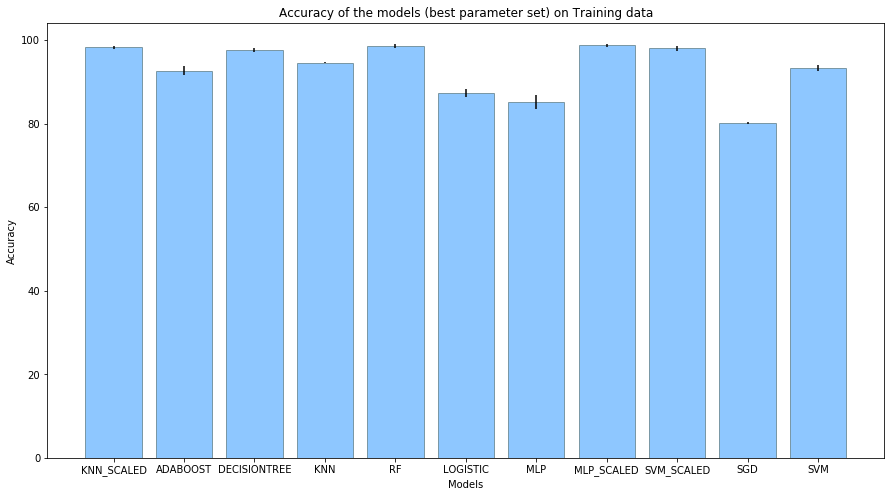

In [5]:
x_old = [i.upper() for i in models]
x = []
for i in x_old:
    if len(i.split("_")) == 2:
        x.append(i.split("_")[0]+"_SCALED")
    else:
        x.append(i)
        
y = [i*100 for i in mean_score]
yerr = [i*100 for i in std_score]

plt.figure(figsize=[15,8])
plt.bar(x, y, yerr=yerr, color="dodgerblue", alpha=0.5, edgecolor="darkslategray")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the models (best parameter set) on Training data")
plt.show()

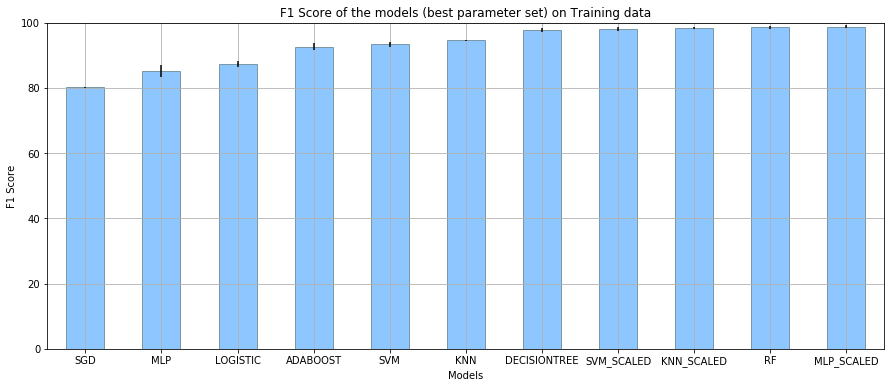

In [6]:
df = pd.DataFrame({'Models':x, 'Mean Accuracy':y, 'Std Accuracy':yerr})
df.sort_values(by=["Mean Accuracy"], inplace=True)
df.plot.bar(x="Models", y="Mean Accuracy", yerr="Std Accuracy", color="dodgerblue", alpha=0.5, 
            edgecolor="darkslategray", title="F1 Score of the models (best parameter set) on Training data", legend=False, figsize=[15,6], rot=0, grid=True, ylim=[0,100])
plt.ylabel("F1 Score")
plt.show()

In [7]:
df

,Models,Mean Accuracy,Std Accuracy
9,SGD,80.219525,0.219607
6,MLP,85.164759,1.746550
5,LOGISTIC,87.427499,0.912857
1,ADABOOST,92.662860,1.051996
10,SVM,93.342191,0.697291
3,KNN,94.592194,0.127961
2,DECISIONTREE,97.744500,0.510452
8,SVM_SCALED,98.127042,0.590630
0,KNN_SCALED,98.317364,0.318184
4,RF,98.626446,0.514454
